<div style="color: #f20044; font-weight: bold; font-size: 24px;">
    Python Learning Session: Week 23 
</div>


main topics #seed #github #xtgeo #sys.args


## Agenda

1. **Recap**
   - GitHub (how to git pull)
   - Seed (simple example)
2. **Xtgeo**
3. **sys.args** (if time permits)

# Reservoir Simulation Hub (ResHub)

## Cloning the Repository

Follow these steps to clone the ResHub repository to your local machine.
Link to Reshub: [ResHub GitHub repository](https://github.com/equinor/reshub).

1. Change directory (`cd`) into the folder where you would like to save the scripts/notebooks.
2. In the terminal, execute the following command to clone the repository:

    ```bash
    git clone https://github.com/equinor/reshub.git
    ```

## Example

Here is an example of how to clone the repository:

```bash
cd path/to/your/folder
git clone https://github.com/equinor/reshub.git


In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Set the seed for reproducibility
seed = 42
np.random.seed(seed)

# Define the number of grid blocks in the reservoir model
num_blocks = 100

# Generate random permeability values (in millidarcies) using a log-normal distribution
# mean and standard deviation can be adjusted based on reservoir properties
mean_log_permeability = 0
std_log_permeability = 1

# Generate log-normal distributed permeability values (This distribution is chosen because reservoir permeability often follows a log-normal distribution)
log_permeability_values = np.random.lognormal(mean=mean_log_permeability, sigma=std_log_permeability, size=num_blocks)

# Convert log permeability to actual permeability
permeability_values = np.exp(log_permeability_values)

# Display the first few permeability values
print("First few permeability values:", permeability_values[:10])

First few permeability values: [  5.17227544   2.38898476   6.76064461  98.11098999   2.20613133
   2.20615998 127.88553028   8.62127485   1.8688642    5.58679369]


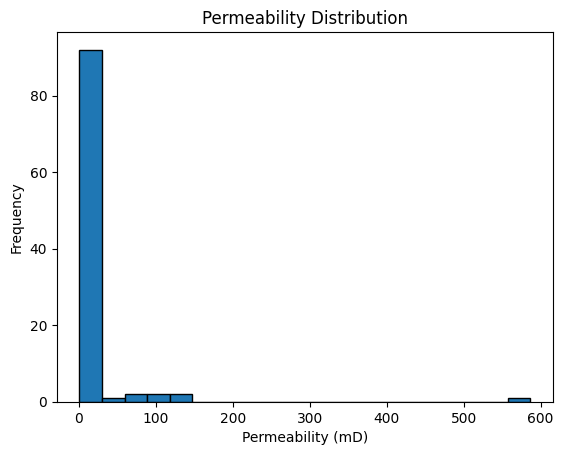

In [16]:
# Plot the permeability distribution
plt.hist(permeability_values, bins=20, edgecolor='black')
plt.title('Permeability Distribution')
plt.xlabel('Permeability (mD)')
plt.ylabel('Frequency')
plt.show()

In [17]:
# Generate random numbers with seed 42
np.random.seed(42)
random_numbers_seed_42 = np.random.random(10)
print("Random numbers with seed 42:")
print(random_numbers_seed_42)

# Generate random numbers with seed 7
np.random.seed(7)
random_numbers_seed_7 = np.random.random(10)
print("\nRandom numbers with seed 7:")
print(random_numbers_seed_7)

# Generate random numbers with seed 42 again
np.random.seed(42)
random_numbers_seed_42_again = np.random.random(10)
print("\nRandom numbers with seed 42 again:")
print(random_numbers_seed_42_again)

Random numbers with seed 42:
[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
 0.05808361 0.86617615 0.60111501 0.70807258]

Random numbers with seed 7:
[0.07630829 0.77991879 0.43840923 0.72346518 0.97798951 0.53849587
 0.50112046 0.07205113 0.26843898 0.4998825 ]

Random numbers with seed 42 again:
[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
 0.05808361 0.86617615 0.60111501 0.70807258]


# Useful links:

## How to Get Statistics from Several Grids in ResInsight

If you need to get statistics from several grids in ResInsight (assuming the same geometry), refer to the following guide:

- [ResInsight Case Groups and Statistics](https://resinsight.org/calculated-data/casegroupsandstatistics/)

## Viva Engage Thread

For discussions and community support, check out the Viva Engage thread:

- [Viva Engage Thread](https://engage.cloud.microsoft/main/org/statoil.com/threads/eyJfdHlwZSI6IlRocmVhZCIsImlkIjoiMjAyNTkwOTc2NjIwMTM0NCJ9?trk_copy_link=V2)

## XTGeo

XTGeo is a library for working with geological data. For detailed documentation, visit:

- [XTGeo Documentation](https://xtgeo.readthedocs.io/en/latest/index.html)

## XTGeoViz

XTGeoViz is a visualization tool for geological data. For more information, see:

- [XTGeoViz Documentation](https://equinor.github.io/xtgeoviz/index.html)


In [4]:
import xtgeo
#import xtgeo.plot
import xtgeoviz

SCRATCH  = '/scratch/fmu/lgal/01_drogon_ahm/realization-0/iter-0/share/results/maps/'
surf = xtgeo.surface_from_file(SCRATCH + 'topvolantis--amplitude_far_mean--20180101.gri')
surf.describe()

Description of RegularSurface instance
Object ID                                => 140327474526816
File source                              => /scratch/fmu/lgal/01_drogon_ahm/realization-0/iter-0/share/results/maps/topvolantis--amplitude_far_mean--20180101.gri
Shape: NCOL, NROW                        => 572  645
Active cells vs total                    => 185568  368940
Origins XORI, YORI                       => 456063.6875  5926551.0
Increments XINC YINC                     => 20.0  20.0
Rotation (anti-clock from X)             => 0.0
YFLIP flag                               => 1
Inlines vector                           => [  1   2   3 ... 570 571 572]
Xlines vector                            => [  1   2   3 ... 643 644 645]
Values                                   => [-- -- -- ... -- -- --]  float64
Values: mean, stdev, minimum, maximum    => 0.1350255508195581  0.055730255320777536  -0.13017889857292175  0.32304874062538147
Minimum memory usage of array (GB)       => 0.002748817205

In [5]:
val = surf.values
print(val.mean())
print(type(val))
print(val.std())

0.1350255508195581
<class 'numpy.ma.core.MaskedArray'>
0.055730255320777536


In [6]:
val = -val +15
print(val.mean())
print(val.std())

14.864974449180442
0.055730255320777536


In [7]:
surf.values = val
print(surf.describe())

Description of RegularSurface instance
Object ID                                => 140327474526816
File source                              => /scratch/fmu/lgal/01_drogon_ahm/realization-0/iter-0/share/results/maps/topvolantis--amplitude_far_mean--20180101.gri
Shape: NCOL, NROW                        => 572  645
Active cells vs total                    => 185568  368940
Origins XORI, YORI                       => 456063.6875  5926551.0
Increments XINC YINC                     => 20.0  20.0
Rotation (anti-clock from X)             => 0.0
YFLIP flag                               => 1
Inlines vector                           => [  1   2   3 ... 570 571 572]
Xlines vector                            => [  1   2   3 ... 643 644 645]
Values                                   => [-- -- -- ... -- -- --]  float64
Values: mean, stdev, minimum, maximum    => 14.864974449180442  0.055730255320777536  14.676951259374619  15.130178898572922
Minimum memory usage of array (GB)       => 0.002748817205429

Description of RegularSurface instance
Object ID                                => 140329048084192
File source                              => test_output--phit_net_average_edit.gri
Shape: NCOL, NROW                        => 572  645
Active cells vs total                    => 185568  368940
Origins XORI, YORI                       => 456063.6875  5926551.0
Increments XINC YINC                     => 20.0  20.0
Rotation (anti-clock from X)             => 0.0
YFLIP flag                               => 1
Inlines vector                           => [  1   2   3 ... 570 571 572]
Xlines vector                            => [  1   2   3 ... 643 644 645]
Values                                   => [-- -- -- ... -- -- --]  float64
Values: mean, stdev, minimum, maximum    => 14.864974450049553  0.055730255251592385  14.67695140838623  15.130178451538086
Minimum memory usage of array (GB)       => 0.002748817205429077


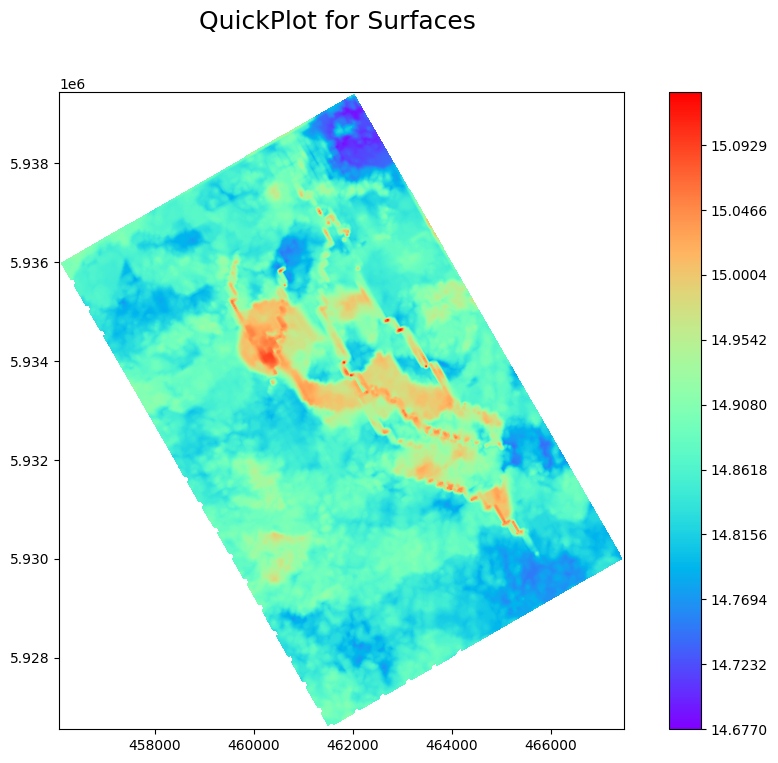

In [8]:
surf.to_file('test_output--phit_net_average_edit.gri')
surf2 = xtgeo.surface_from_file('test_output--phit_net_average_edit.gri')
surf2.describe()
surf.quickplot()